<a href="https://colab.research.google.com/github/Sriyasnehasis/Python-Projects/blob/Manual/Air_Quality_Tracker_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Required Libraries**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset Loading**

In [84]:
 def load_data(file_path=None):
    """Load the dataset from the given file path or allow the user to input data manually."""
    if file_path:
        try:
            data = pd.read_csv(file_path)
            print("File loaded successfully.")
            return data
        except FileNotFoundError:
            raise FileNotFoundError(f"The file at path '{file_path}' was not found. Please check the file path.")
        except Exception as e:
            raise Exception(f"An error occurred while loading the file: {e}")
    else:
        print("No file path provided. Please input the data manually.")
        columns = input("Enter column names separated by commas: ").split(',')
        print("Now enter the data row by row. Type 'done' when finished.")
        rows = []
        while True:
            row = input("Enter a row of data separated by commas or type 'done': ")
            if row.lower() == 'done':
                break
            rows.append(row.split(','))

        # Create a DataFrame from the manual input
        data = pd.DataFrame(rows, columns=columns)

        # Attempt to convert all columns to numeric where possible
        for col in data.columns:
            try:
                data[col] = pd.to_numeric(data[col], errors='ignore')
            except Exception as e:
                print(f"Could not convert column '{col}' to numeric: {e}")

        print("Data entered successfully.")
        return data

**Data Exploration**

In [85]:
def preview_data(data):
    """Preview the dataset."""
    print("Data preview:")
    print(data.head())
    print("\nData Shape:")
    print(data.shape)
    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values:")
    print(data.isnull().sum())

**Grouping**

In [86]:
def group_data(data):
    if 'Date' in data.columns:
     data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
    else:
     raise ValueError("The dataset must contain a 'Date' column.")

    data['YearMonth'] = data['Date'].dt.to_period('M')
    return data

**Data Cleaning**

In [87]:
def clean_data(data):
    """Clean the data by removing rows with missing values."""
    data = data.dropna()
    print("\nData after cleaning:")
    print(data.info())
    return data

**Find Numeric Pollutant Columns**

In [88]:
def find_pollutant_columns(data):
    """Find numeric columns representing pollutants."""
    pollutant_columns = [col for col in data.columns
                         if col not in ['Date', 'YearMonth'] and
                         data[col].dtype in [np.int64, np.float64]]
    print("\nNumeric pollutant columns identified:")
    print(pollutant_columns)
    return pollutant_columns

**Monthly Pollutant Averages**

In [89]:
def calculate_monthly_averages(data, pollutant_columns):
    """Calculate monthly averages for the given pollutant columns."""
    return data.groupby('YearMonth')[pollutant_columns].mean()

**Most Polluted Months**

In [90]:
def identify_most_polluted_months(averages):
    """Identify the most polluted months for each pollutant."""
    return averages.idxmax()

**Line Plots**

In [91]:
def plot_monthly_trends(monthly_averages, pollutant_columns):
    """Plot line charts for monthly pollutant trends."""
    plt.figure(figsize=(12, 8))
    for pollutant in pollutant_columns:
        plt.plot(monthly_averages.index.astype(str), monthly_averages[pollutant], label=pollutant)

    plt.title('Monthly Trends of Pollutants')
    plt.xlabel('Month')
    plt.ylabel('Pollutant Levels')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


**Scatter Plot**

In [92]:
def plot_pollutant_comparisons(monthly_averages, pollutant_columns):
    """Plot scatter charts to compare pollutant levels."""
    plt.figure(figsize=(10, 6))
    for i, pollutant in enumerate(pollutant_columns[:-1]):
        plt.scatter(monthly_averages[pollutant], monthly_averages[pollutant_columns[i + 1]], label=f"{pollutant} vs {pollutant_columns[i + 1]}")

    plt.title('Pollutant Comparisons')
    plt.xlabel('Pollutant Levels')
    plt.ylabel('Pollutant Levels')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


**Key Insights**

In [93]:
def key_insights(averages, pollutant_columns):
    """Print key insights about the pollutants."""
    print("\nKey Insights:")
    for pollutant in pollutant_columns:
        print(f"- {pollutant}: Highest level recorded in {averages[pollutant].idxmax()} with a mean value of {averages[pollutant].max():.2f}.")


**Main Function**

Enter the file path for the dataset (leave blank to input data manually): 
No file path provided. Please input the data manually.
Enter column names separated by commas: City,Date,CO,NO,O3
Now enter the data row by row. Type 'done' when finished.
Enter a row of data separated by commas or type 'done': Mumbai,11-09-2009,2.56,3.09,09.12
Enter a row of data separated by commas or type 'done': Delhi,01-05-2024,18.00,17.98,41.21
Enter a row of data separated by commas or type 'done': Chennai,29-12-2023,00.89,08.37,23.76
Enter a row of data separated by commas or type 'done': done


<ipython-input-84-6a2f5b615705>:29: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


Data entered successfully.
Data preview:
      City        Date     CO     NO     O3
0   Mumbai  11-09-2009   2.56   3.09   9.12
1    Delhi  01-05-2024  18.00  17.98  41.21
2  Chennai  29-12-2023   0.89   8.37  23.76

Data Shape:
(3, 5)

Data Types:
City     object
Date     object
CO      float64
NO      float64
O3      float64
dtype: object

Missing Values:
City    0
Date    0
CO      0
NO      0
O3      0
dtype: int64

Numeric pollutant columns identified:
['CO', 'NO', 'O3']

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       3 non-null      object        
 1   Date       3 non-null      datetime64[ns]
 2   CO         3 non-null      float64       
 3   NO         3 non-null      float64       
 4   O3         3 non-null      float64       
 5   YearMonth  3 non-null      period[M]     
dtypes: datetime64[n

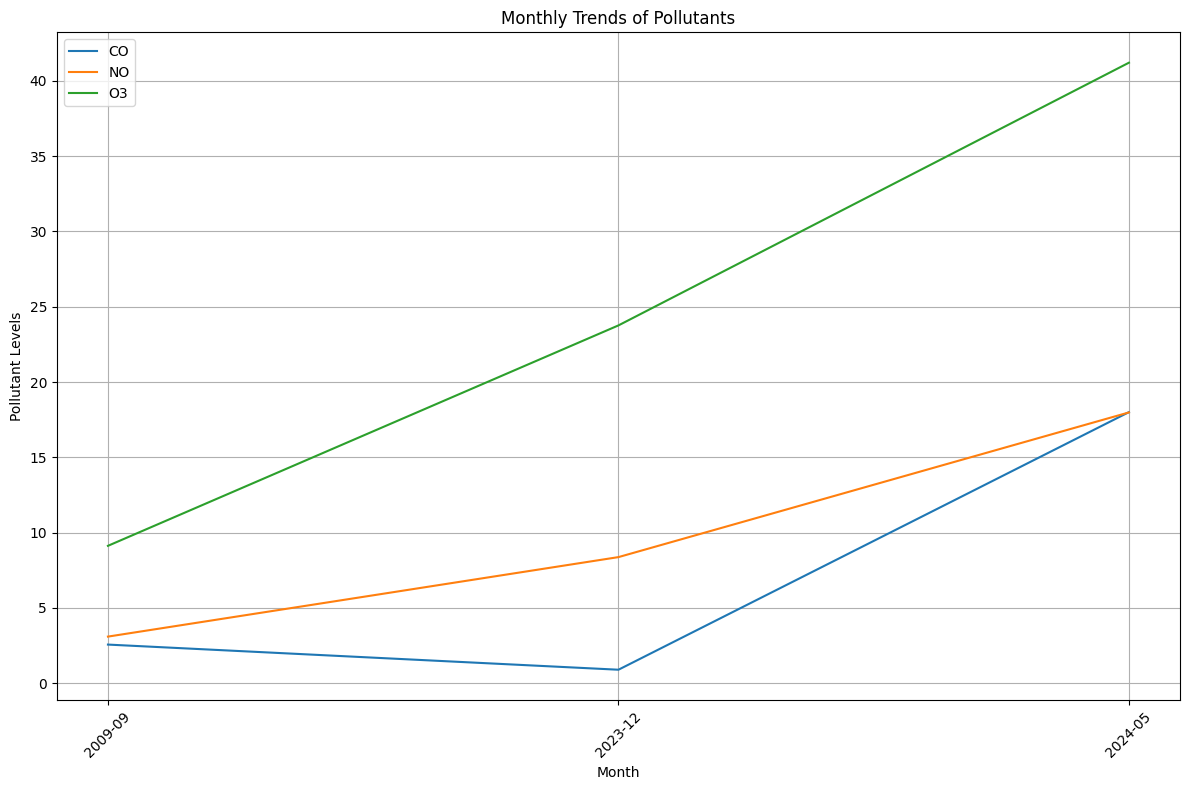

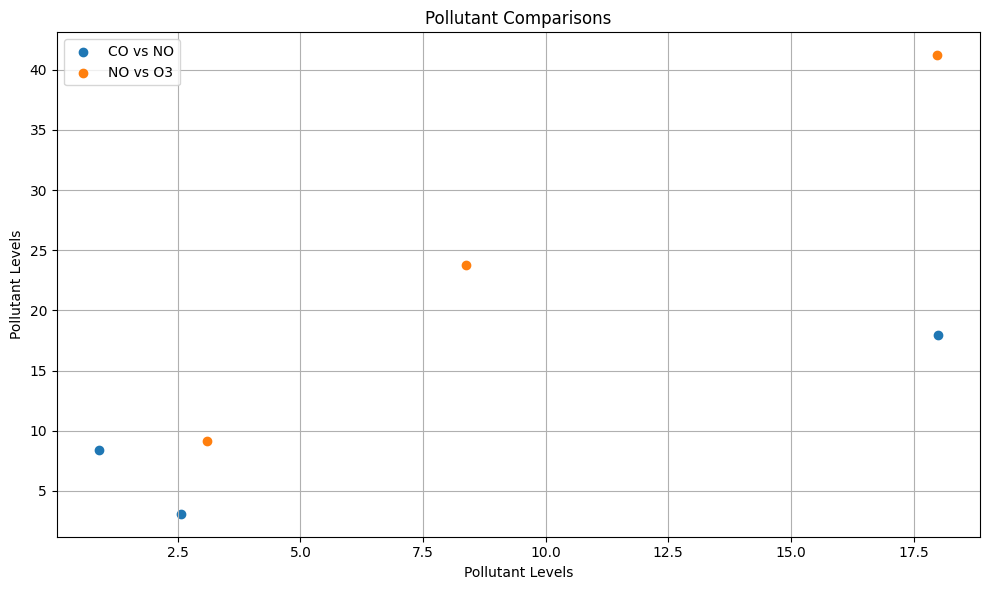


Key Insights:
- CO: Highest level recorded in 2024-05 with a mean value of 18.00.
- NO: Highest level recorded in 2024-05 with a mean value of 17.98.
- O3: Highest level recorded in 2024-05 with a mean value of 41.21.


In [94]:
def main():
    file_path = input("Enter the file path for the dataset (leave blank to input data manually): ")

    # Load data
    data = load_data(file_path if file_path.strip() else None)

    # Preview data
    preview_data(data)

    # Group data
    if 'Date' not in data.columns:
        raise ValueError("The dataset must contain a 'Date' column.")
    data = group_data(data)

    # Find numeric pollutant columns
    pollutant_columns = find_pollutant_columns(data)

    # Clean data
    data = clean_data(data)

    # Calculate monthly averages
    monthly_averages = calculate_monthly_averages(data, pollutant_columns)

    print("\nMonthly pollutant averages:")
    print(monthly_averages)

    # Identify most polluted months
    most_polluted_months = identify_most_polluted_months(monthly_averages)
    print("\nMost polluted months for each pollutant:")
    print(most_polluted_months)

    # Plot data visualizations
    plot_monthly_trends(monthly_averages, pollutant_columns)
    plot_pollutant_comparisons(monthly_averages, pollutant_columns)

    # Key insights
    key_insights(monthly_averages, pollutant_columns)

if __name__ == "__main__":
    main()